#### Teoría de Circuitos II

# Trabajo semanal 3
#### 


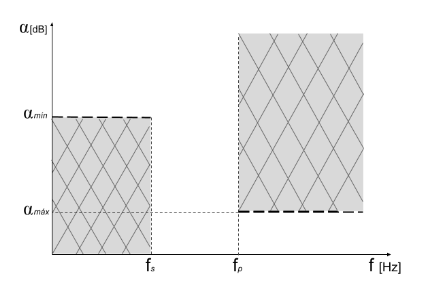

#### Datos:
⍺min[dB] = 35

⍺máx[dB] = 1

fp[Hz] = 3500

fs[Hz] = 1000

#### Consignas
1) Obtener polos y ceros para máxima planicidad en la banda de paso.

2) Comparar con los polos obtenidos en el ejercicio 3.3. (Este NO! para la TS3, si para el TP2)

3) Implementar el circuito con estructuras pasivas adaptadas mediante buffers.

4) Utilizando una norma de impedancia ZN = 1K, obtenga el valor de los componentes.

5) Active las bobinas utilizando una estructura con OPAMPs.

#### Bonus
+10  💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10  ⚽️ Simulación numérica y circuital.

+10  🍺 Presentación en jupyter notebook

1) Resolucion 

Primero se define y normaliza a partir los requisitos solicitados.

In [5]:
import math as m
Wp = 2 * m.pi * 3.5*(10**3)
Ws = 2 * m.pi * (10**3)

## Normalizo
Wp_n = 1
Ws_n = Ws/Wp

print(f'Wp_n = {Wp_n},Ws_n = {Ws_n}')

Wp_n = 1,Ws_n = 0.2857142857142857


Una vez normalizado ,se buscara el prototipo del filtro equivalente pasabajos.

In [6]:
Wp_LP = 1 / Wp_n
Ws_LP = 1 / Ws_n
print(f'Wp_LP = {Wp_LP},Ws_LP = {Ws_LP}')

Wp_LP = 1.0,Ws_LP = 3.5


Se procede a buscar el orden del filtro a diseñar.

In [33]:
Alfa_min = 35
Alfa_max = 1

## Calculo el epsilon y con el el N
Epsilon = m.sqrt(m.pow(10 , 0.1 * Alfa_max) - 1)


#N_Chevy = m.acosh((m.pow(10, Alfa_min * 0.1) - 1 ) / (m.pow(10, Alfa_max * 0.1) - 1) / (2 * m.acosh(Ws_LP)) )

# Maxima planicidad
N = (m.log10( (m.pow(10,Alfa_min * 0.1) - 1) / (m.pow(10,Alfa_max * 0.1) - 1) ) ) / ( 2 * m.log10(Ws_LP))


N=m.ceil(N)
print(f'Epsilon = {Epsilon},N_MP = {N}')

Epsilon = 0.5088471399095875,N_MP = 4


Mediante esos datos , se puede ontener la |H(s)|^2

\begin{equation}
|H(Ω)|^2 = \frac{1}{ 1 + ε^2 * Ω^ (2n)} = |H(Ω)||H(-Ω)|
\end{equation}

\begin{equation}
|H(s)|^2 = \frac{1}{ 1 + ε^2 * s^8}
\end{equation}

Sabiendo que H(Ω) es de orden 4 podemos plantear a uno generico y asi hallar las constantes

\begin{equation}
\frac{1}{ε^2 * s^8 +1 } = \frac{1}{A s^4 + Bs^3 + Cs^2 + Ds + E } * \frac{1}{A s^4 + -Bs^3 + Cs^2 + -Ds + E }
\end{equation}

Por sistema de ecuaciones:
\begin{equation}
2CE = D^2
\end{equation}
\begin{equation}
2AE + C^2 = 2DB
\end{equation}
\begin{equation}
2AC = B^2
\end{equation}
\begin{equation}
E^2 = 1 
\end{equation}
\begin{equation}
A = ε 
\end{equation}

Resuelvo el sistema de ecuaciones y se obtiene:
\begin{equation}
C^2 - 4* (sqrt(ε)) +2ε = 0
\end{equation}

Se procede a obtener los valores de las constantes:

In [42]:
import numpy as np
np.roots([1,-4*(m.sqrt(Epsilon)),2*Epsilon])

##Tomo a C=2.43547879
##Resuelvo las ecuaciones obteniendo 
A=Epsilon
B=1.5742
C=2.43547879
D=2.2069
E=1

print(f'A = {Epsilon},B = {B},C = {C},D = {D},E = {E}')

A = 0.5088471399095875,B = 1.5742,C = 2.43547879,D = 2.2069,E = 1


Finalmente se obtiene H(s) y se descarta H(-s)
\begin{equation}
H(s)= \frac{1}{A s^4 + Bs^3 + Cs^2 + Ds + E }
\end{equation}

Despejo el factor de mayor orden quedando la transferencia pasa-bajo prototipo
\begin{equation}
H(s)= \frac{1}{s^4 + \frac{Bs^3 }{A}+ \frac{Cs^2}{A} + \frac{Ds}{A} + \frac{E}{A}}
\end{equation}

Una vez obtenida se debe aplicar el nucleo de la transformada de forma de pasarlo a pasa-altos

\begin{equation}
H(s= \frac{1}{s})= \frac{s^4}{A s^4 + Bs^3 + Cs^2 + Ds + E }
\end{equation}

Por deduccion se sabe que hay 4 ceros en el origen

Busco las raices de el denominador

In [43]:
np.roots([A,B,C,D,E])

array([-0.45320184+1.09389282j, -0.45320184-1.09389282j,
       -1.09362811+0.45355819j, -1.09362811-0.45355819j])

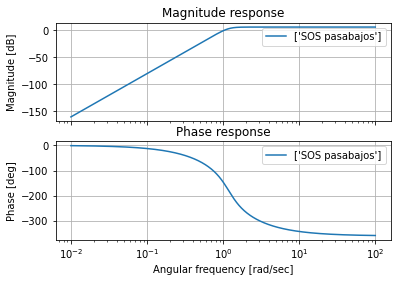

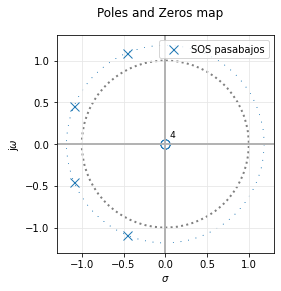

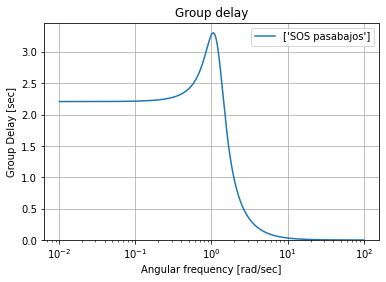

In [69]:
import scipy
import scipy.signal as signal
from scipy import signal as sig
from splane import analyze_sys

num=[1, 0, 0, 0, 0]
den=[A, B, C, D, E]

mi_sos = sig.TransferFunction(num,den)
    
analyze_sys(mi_sos, 'SOS pasabajos')